<a href="https://colab.research.google.com/github/Soclar57/difraccion/blob/main/difraccion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scipy numpy pandas matplotlib reportlab pypdf


In [ ]:
# cargar datos
import pandas as pd
url = "https://raw.githubusercontent.com/Soclar57/difraccion/main/20_diffrac.csv"
df = pd.read_csv(url)
df.head()

,angle_deg,intensity
0,20.000000,1.754926
1,20.035018,-0.911373
2,20.070035,-2.131873
3,20.105053,1.237525
4,20.140070,-0.015476


In [ ]:
ang = df['angle_deg']
i_rel = df['intensity']/max(df['intensity'])

# encontrar picos
from scipy.signal import find_peaks
peaks = find_peaks(i_rel, height=0.2)[0]

for peak in peaks:
    print(str(ang[peak]) + ": " + str(i_rel[peak]))

44.54727363681841: 0.3346736366236372
51.90095047523762: 0.9973957470015956
76.4832416208104: 1.0


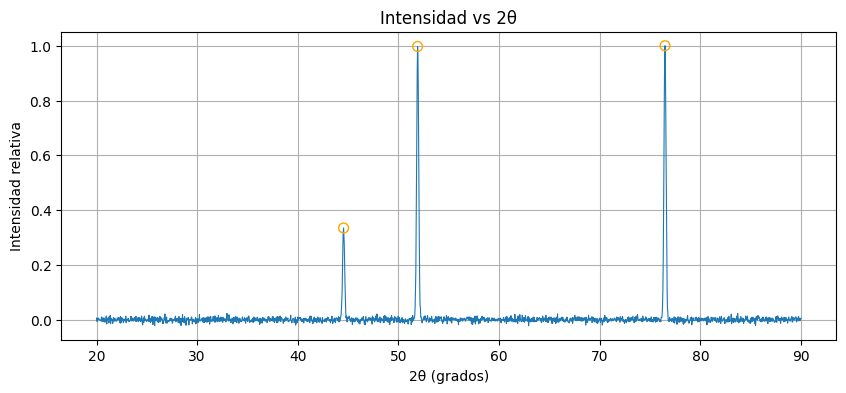

In [ ]:
# graficar datos
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.plot(ang, i_rel, lw=0.8)

plt.scatter(ang[peaks], i_rel[peaks],
            facecolors='none',
            color='orange',
            marker='o',
            s=50,
            zorder=5,
            label='Picos Detectados')

plt.xlabel('2θ (grados)')
plt.ylabel('Intensidad relativa')
plt.title('Intensidad vs 2θ')
plt.grid(True)
plt.show()


In [ ]:
# calcular distancias entre planos
import numpy as np

l = 1.5406*10**(-10)
d = l/(2*np.sin(ang[peaks]*np.pi/360))
print(d)


701     2.032291e-10
911     1.760307e-10
1613    1.244469e-10
Name: angle_deg, dtype: float64


In [ ]:
# tabla d
table0=[]
for i in range(len(d)):
  table0.append((d.iloc[i]/d.iloc[0])**2)

print(table0)

[np.float64(1.0), np.float64(0.7502486197464582), np.float64(0.3749696721565962)]


In [ ]:
# generar indices
all_index = []
max_hkl = 10
for h in range(1, max_hkl + 1):
    for k in range(0, h + 1):
        for l in range(0, k + 1):
            if h >= k >= l and (h != 0 or k != 0 or l != 0):
              all_index.append(np.array([h,k,l]))

In [ ]:
# tabla SC

table1 = []
index_ref = None
i=0
while len(table1)<len(peaks):

    index = all_index[i]
    i += 1

    if index_ref is None:
      index_ref = index.copy()

    table1.append(np.sum(index_ref**2) / np.sum(index**2))

print(table1)

[np.float64(1.0), np.float64(0.5), np.float64(0.3333333333333333)]


In [ ]:
# tabla BCC

table2 = []
index_ref = None
i=0
while len(table2)<len(peaks):
    index = all_index[i]
    i+=1

    # condicion
    if np.sum(index) % 2 != 0:
      continue

    if index_ref is None:
      index_ref = index.copy()

    table2.append(np.sum(index_ref**2) / np.sum(index**2))

print(table2)

[np.float64(1.0), np.float64(0.5), np.float64(0.3333333333333333)]


In [ ]:
# tabla FCC

table3 = []
index_ref = None
i=0
while len(table3) < len(peaks):
    index = all_index[i]
    i+=1

    if not ( (index[0] % 2 == 0 and index[1] % 2 == 0 and index[2] % 2 == 0) or \
             (index[0] % 2 != 0 and index[1] % 2 != 0 and index[2] % 2 != 0) ):
      continue

    if index_ref is None:
      index_ref = index.copy()

    table3.append(np.sum(index_ref**2) / np.sum(index**2))

print(table3)

[np.float64(1.0), np.float64(0.75), np.float64(0.375)]


In [ ]:
# tabla Diamante

table4 = []
index_ref = None
i=0
while len(table4) < len(peaks):
    index = all_index[i]
    i+=1

    if not ( ((index[0] % 2 == 0 and index[1] % 2 == 0 and index[2] % 2 == 0) or \
              (index[0] % 2 != 0 and index[1] % 2 != 0 and index[2] % 2 != 0)) and \
             (np.sum(index) % 4 == 2) ):
      continue

    if index_ref is None:
      index_ref = index.copy()

    table4.append(np.sum(index_ref**2) / np.sum(index**2))

print(table4)

[np.float64(1.0), np.float64(0.3333333333333333), np.float64(0.2)]


In [ ]:
import pandas as pd

# Asegurarse de que todas las listas tengan la misma longitud para la tabla
max_len = max(len(table0), len(table1), len(table2), len(table3), len(table4))

# Rellenar las listas más cortas con None para que tengan la misma longitud
def pad_list(lst, length):
    return lst + [None] * (length - len(lst))

padded_table0 = pad_list(table0, max_len)
padded_table1 = pad_list(table1, max_len)
padded_table2 = pad_list(table2, max_len) # Usar 'table2' que es la de BCC
padded_table3 = pad_list(table3, max_len)
padded_table4 = pad_list(table4, max_len)


# Crear un DataFrame para mostrar las tablas
comparison_table = pd.DataFrame({
    'table0 (Experimental)': padded_table0,
    'table1 (SC)': padded_table1,
    'table2 (BCC)': padded_table2,
    'table3 (FCC)': padded_table3,
    'table4 (Diamante)': padded_table4
})

print("Tabla de comparación de valores:")
display(comparison_table)

Tabla de comparación de valores:


,table0 (Experimental),table1 (SC),table2 (BCC),table3 (FCC),table4 (Diamante)
0,1.000000,1.000000,1.000000,1.000,1.000000
1,0.750249,0.500000,0.500000,0.750,0.333333
2,0.374970,0.333333,0.333333,0.375,0.200000


In [ ]:
# es una FCC
# Parametro de red
a = np.sqrt(3*(d.iloc[0]**2))*(10**10)
print(a)

3.5200308717214446
